In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.dpi'] = 120

In [4]:
columnas=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
         'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv('housing.csv',sep = r"\s+",names=columnas)
#separador espacio r"\s+"

In [6]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

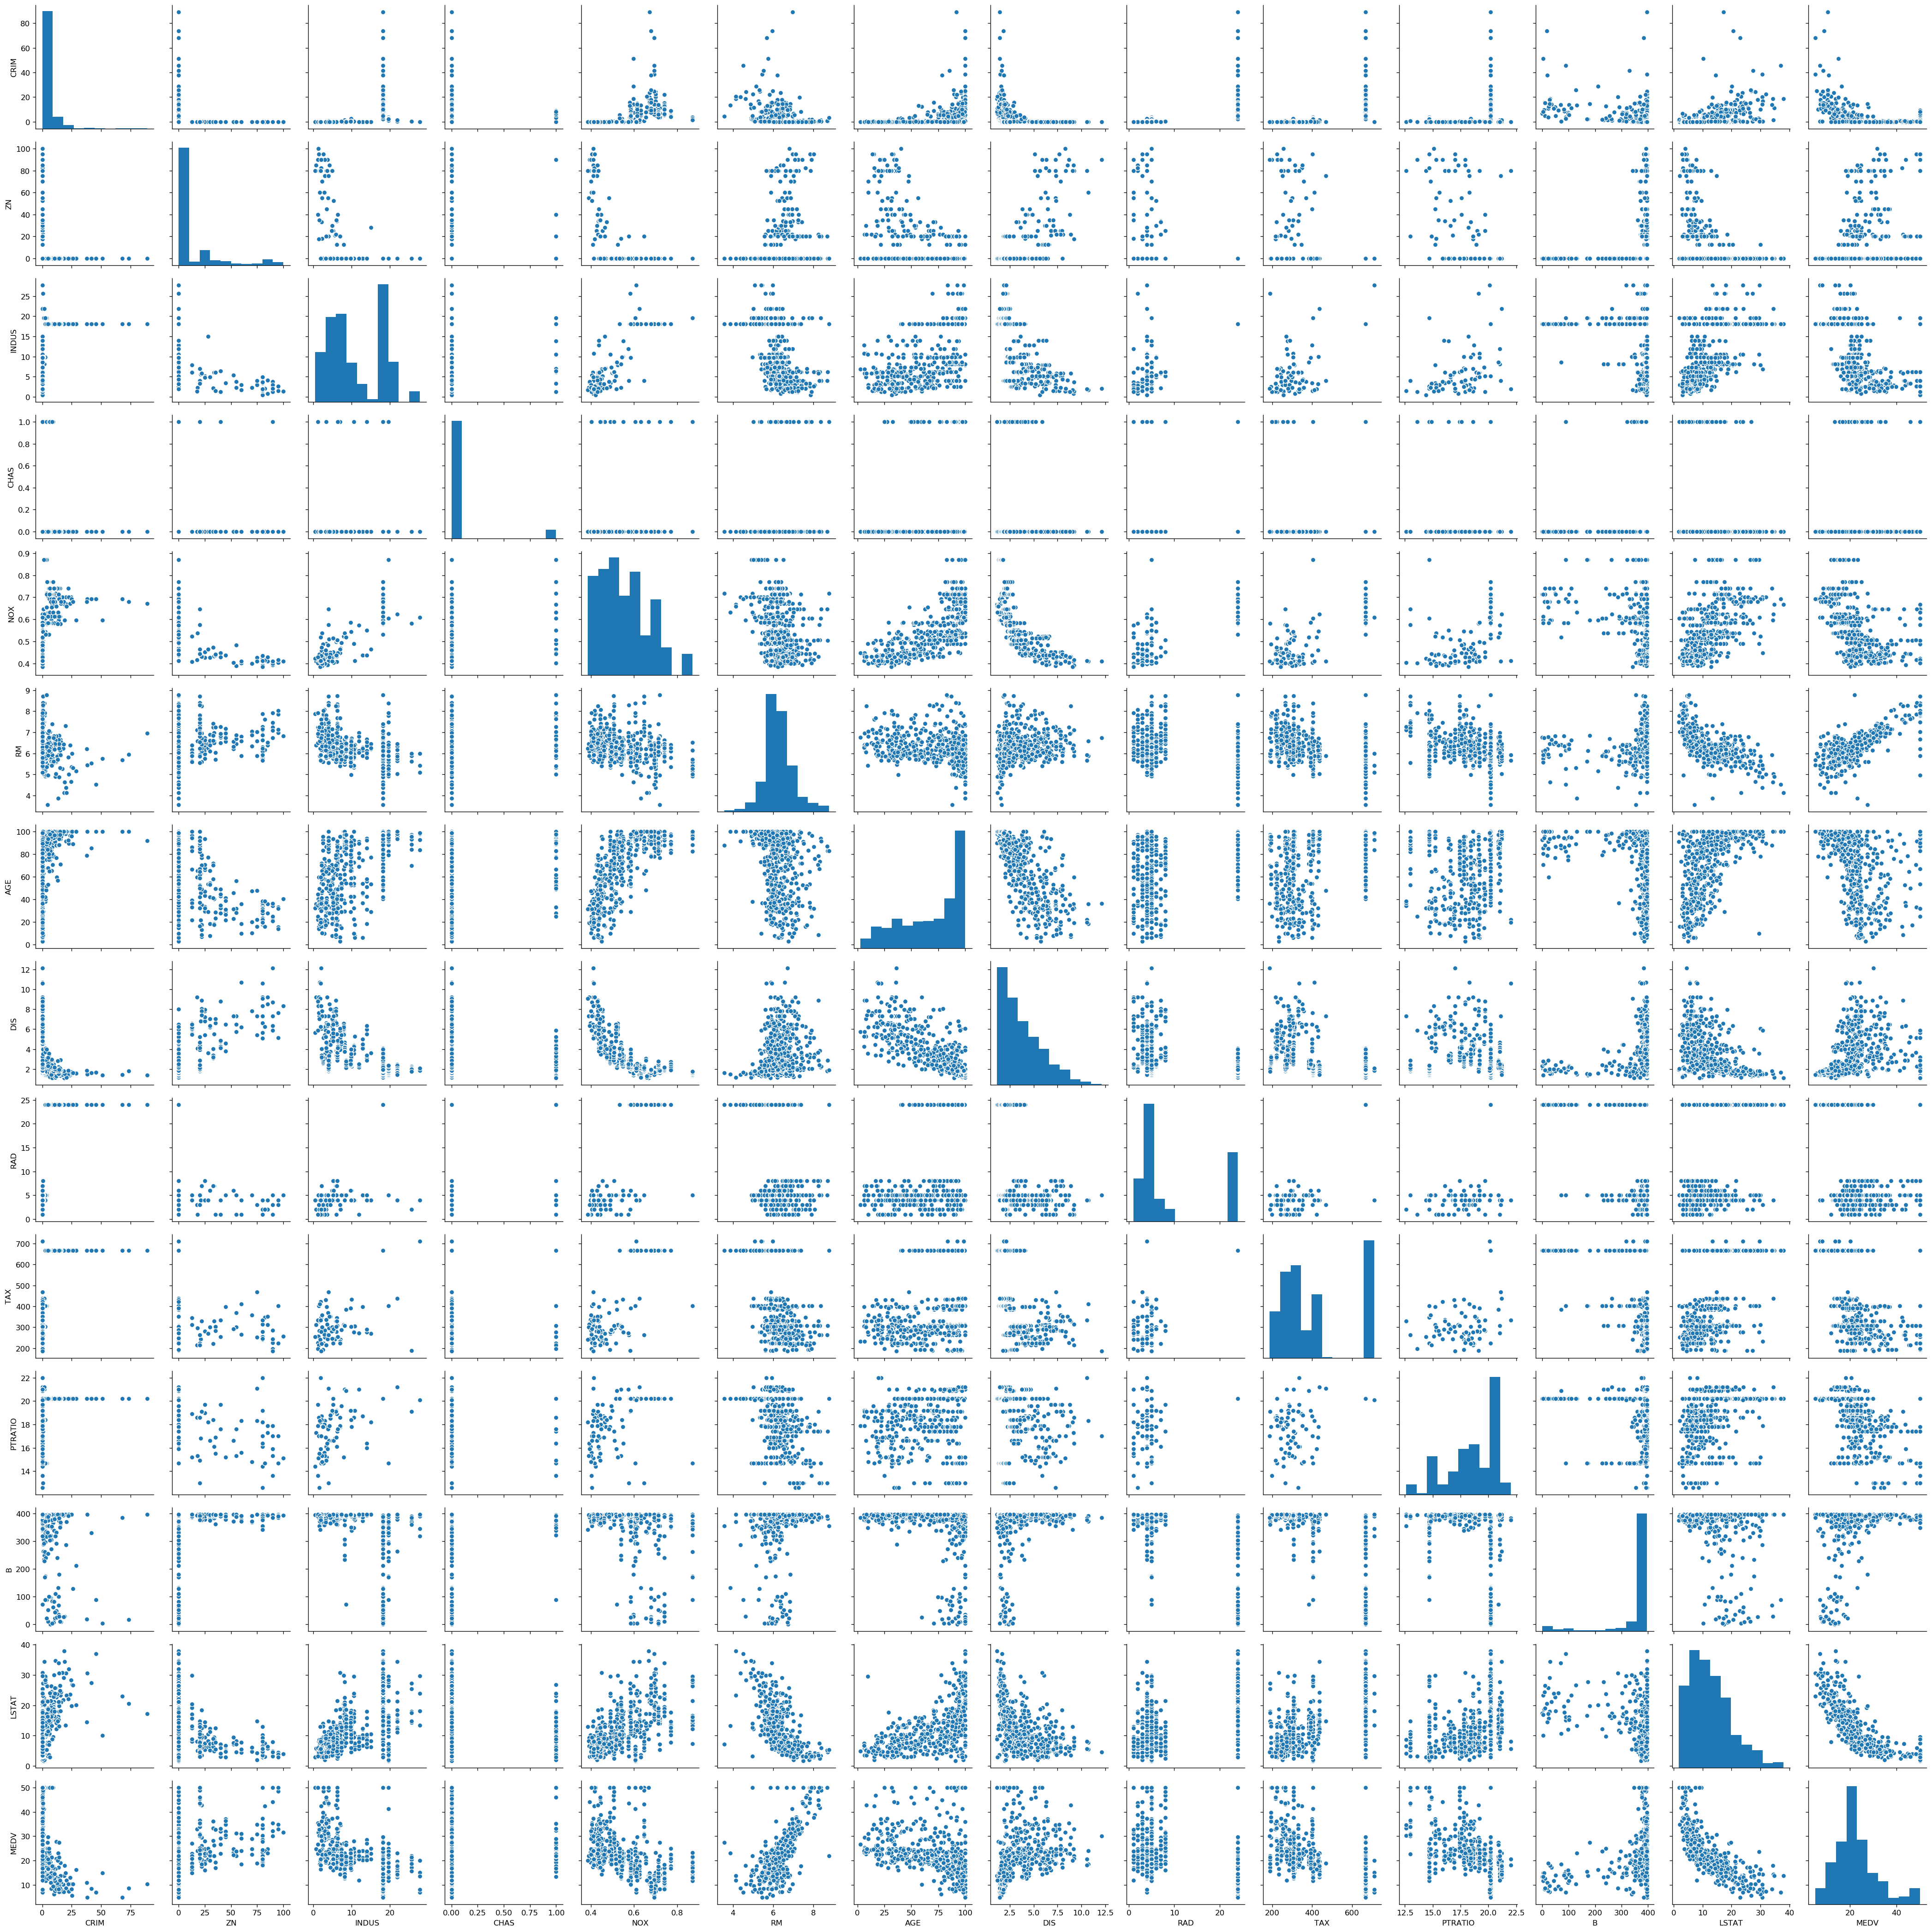

In [13]:
#diagramas de dispersion
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df,height=2.5)
plt.tight_layout()
plt.show()

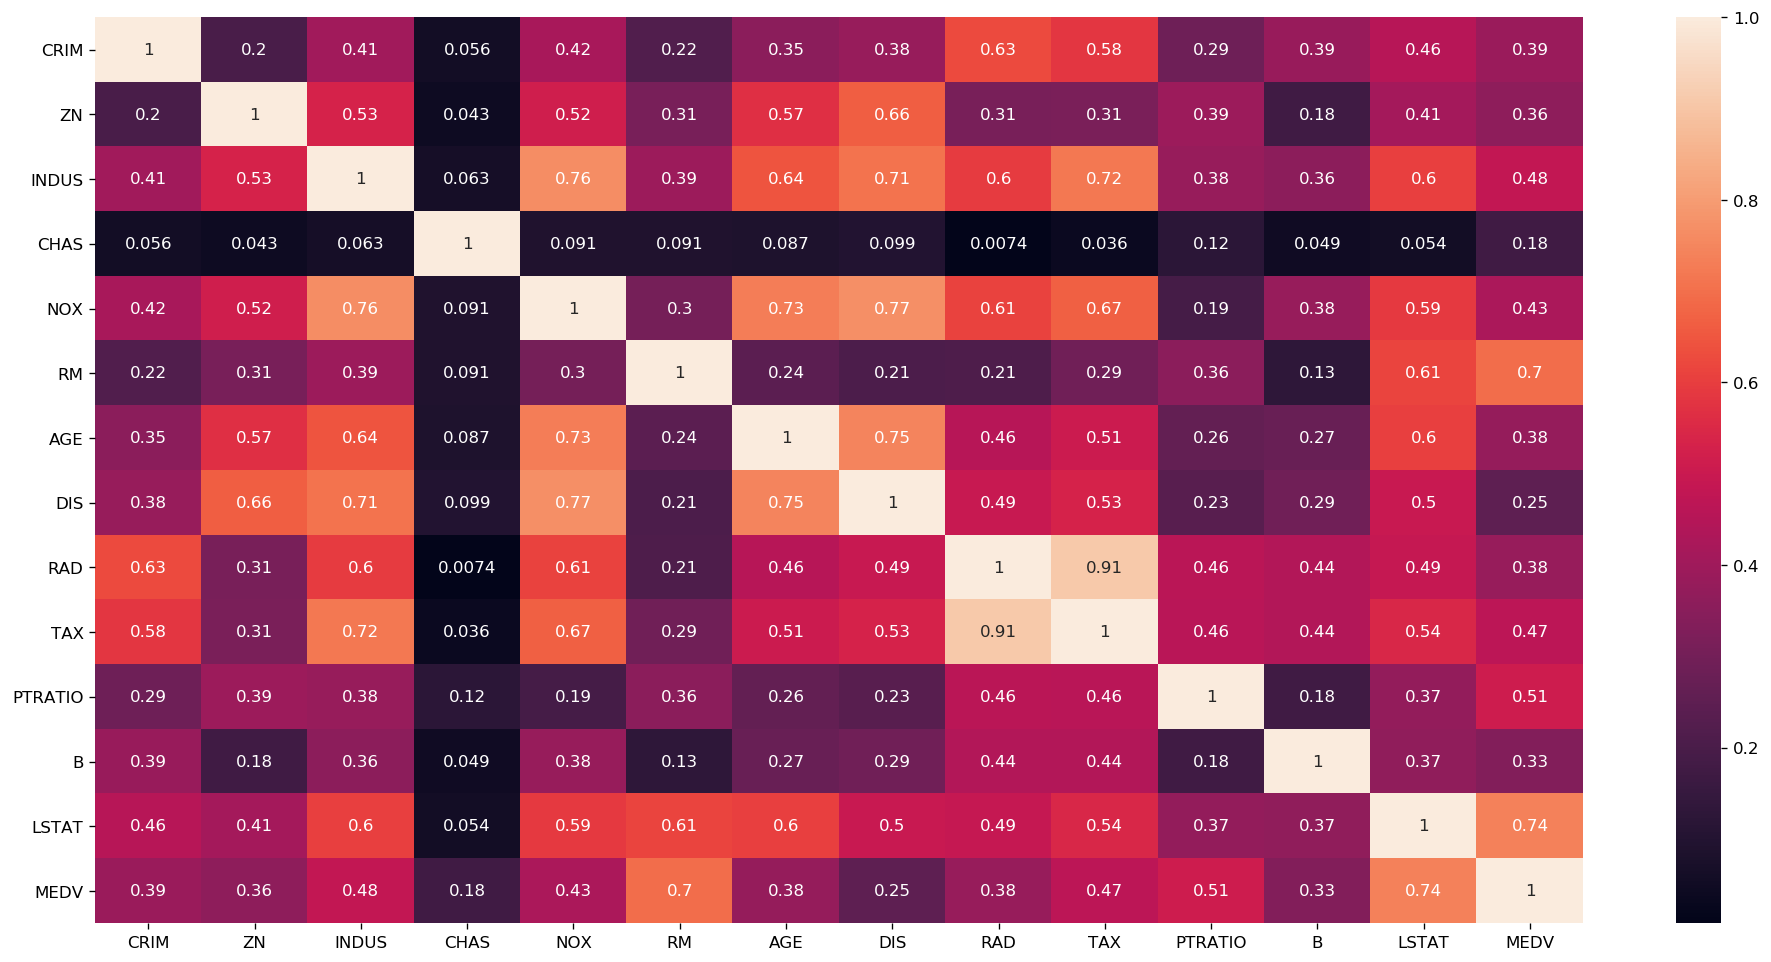

In [14]:
# mapa de calor (correlaciones)
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),
           annot=True,
           annot_kws={'size':10})
plt.show()

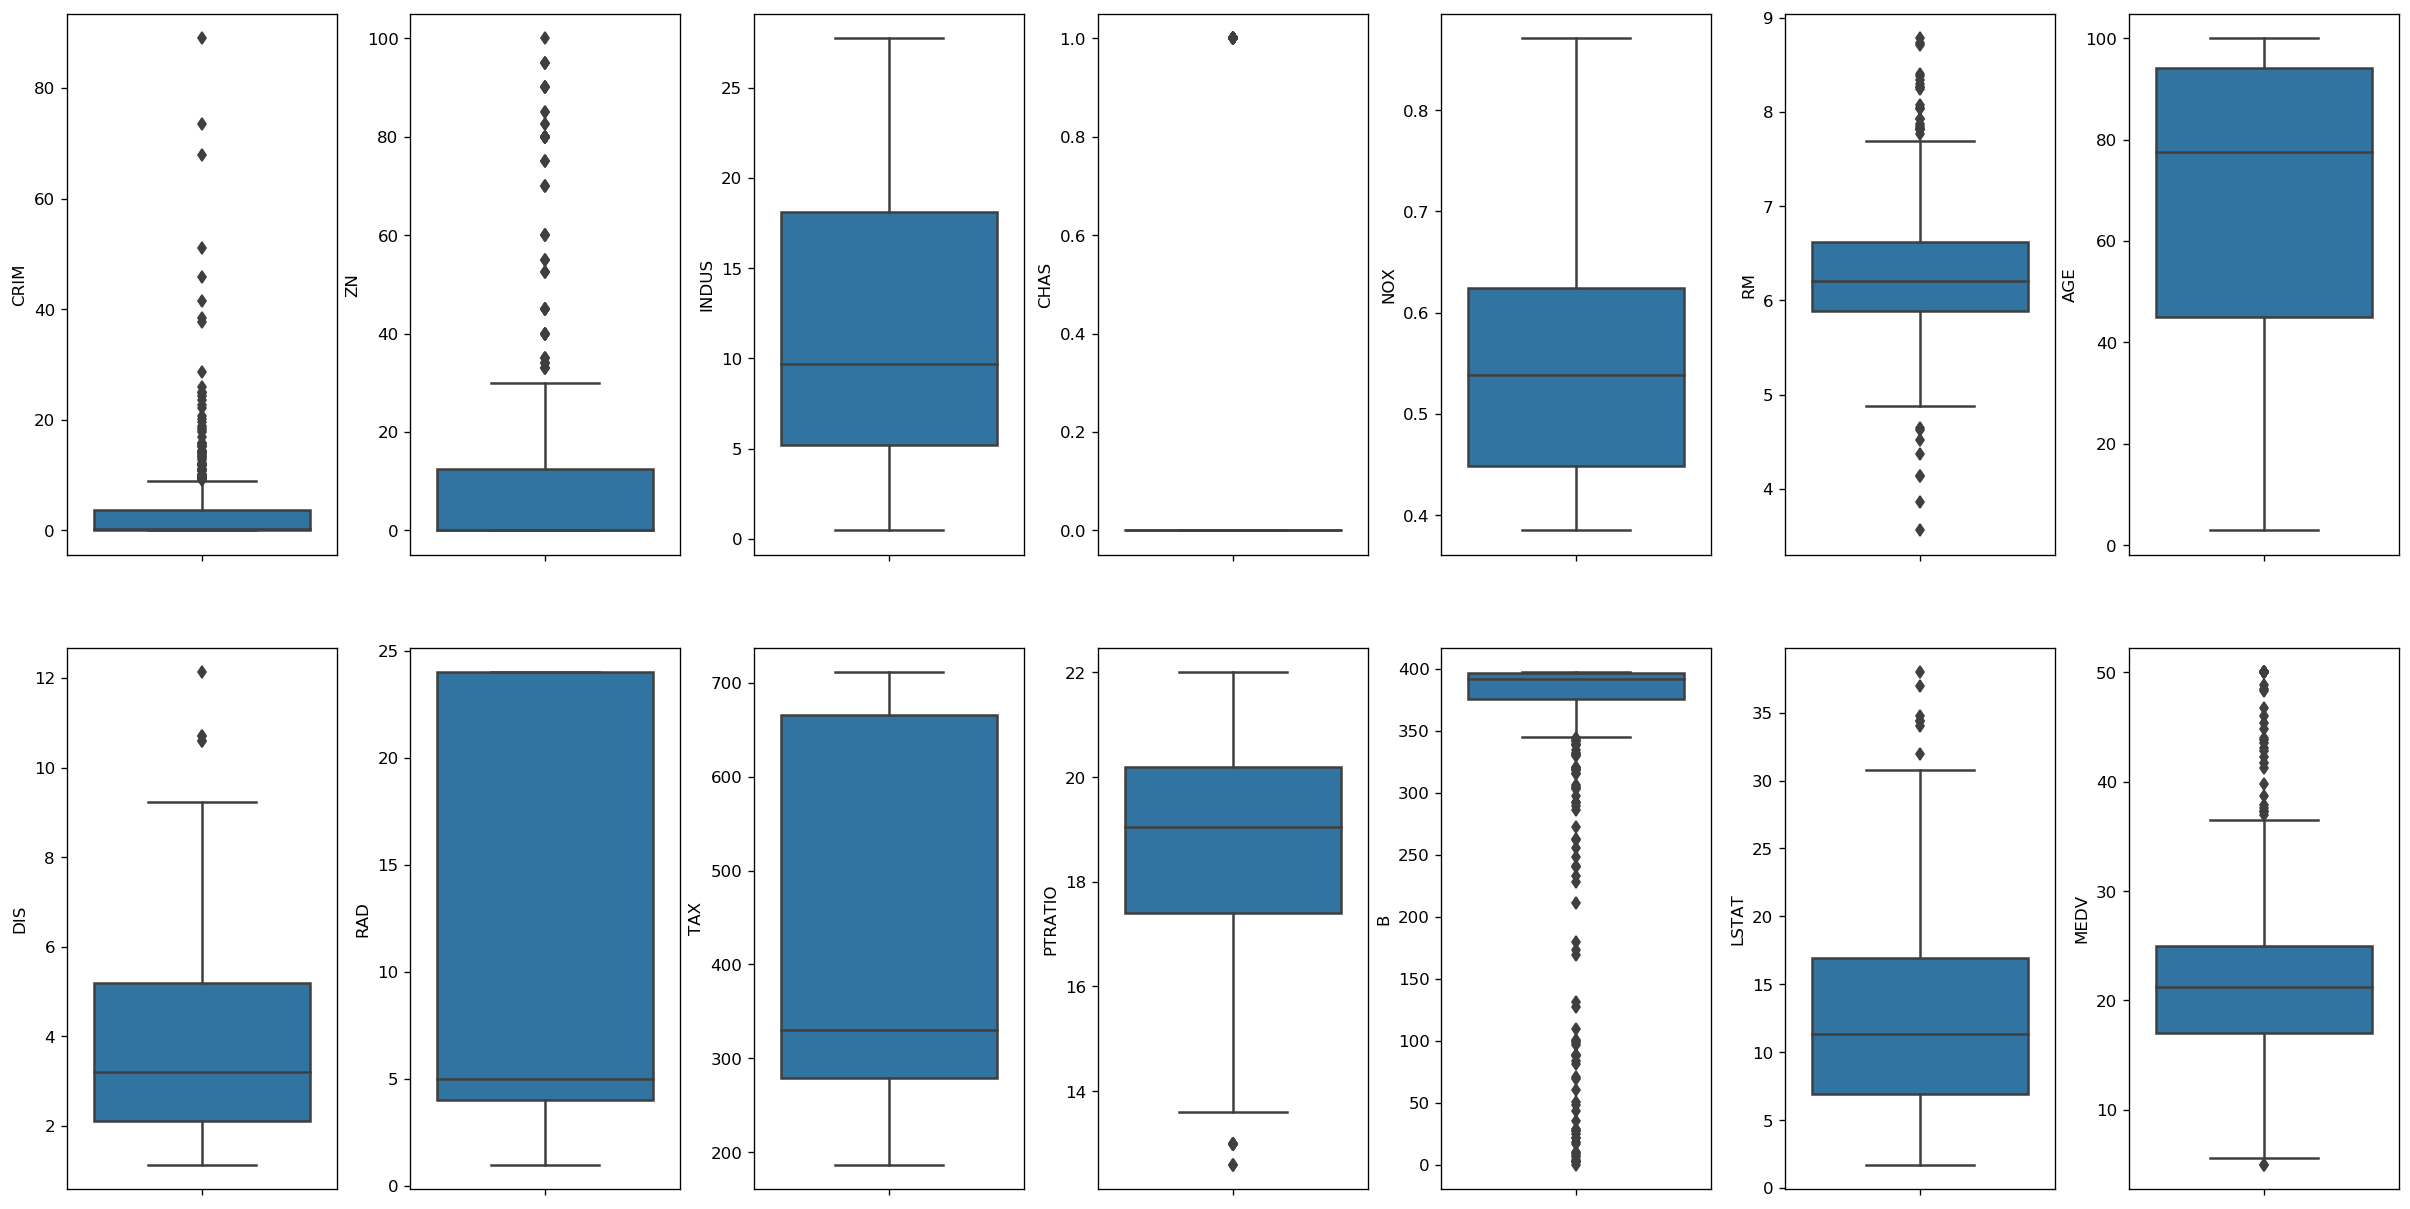

In [17]:
fig,axs = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
axs=axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k,data=df,ax=axs[index])
    index+=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5)
    

In [20]:
#porcentaje de outliers por columna
for k,v in df.items():
    q1=v.quantile(0.25)#cuartil 1
    q3=v.quantile(0.75)#cuartil 3
    irq=q3-q1 #distancia intercuartil
    v_col=v[(v<=q1-1.5*irq)|(v>=q3+1.5*irq)]
    perc = np.shape(v_col)[0]*100/np.shape(df)[0]
    print('columna %s outliers = %.2f%%' % (k,perc))

columna CRIM outliers = 13.04%
columna ZN outliers = 13.44%
columna INDUS outliers = 0.00%
columna CHAS outliers = 100.00%
columna NOX outliers = 0.00%
columna RM outliers = 5.93%
columna AGE outliers = 0.00%
columna DIS outliers = 0.99%
columna RAD outliers = 0.00%
columna TAX outliers = 0.00%
columna PTRATIO outliers = 2.96%
columna B outliers = 15.22%
columna LSTAT outliers = 1.38%
columna MEDV outliers = 7.91%


In [22]:
#quitar las observaciones cuyo MEDV sea un outlier
MEDV_q3 = df['MEDV'].quantile(0.75)
MEDV_q1 = df['MEDV'].quantile(0.25)
MEDV_irq = MEDV_q3 - MEDV_q1
big_sup = MEDV_q3+1.5 * MEDV_irq
big_inf = MEDV_q1-1.5 * MEDV_irq
df = df[~(df['MEDV']>=big_sup)]
df = df[~(df['MEDV']<=big_inf)]

In [23]:
df.shape

(466, 14)

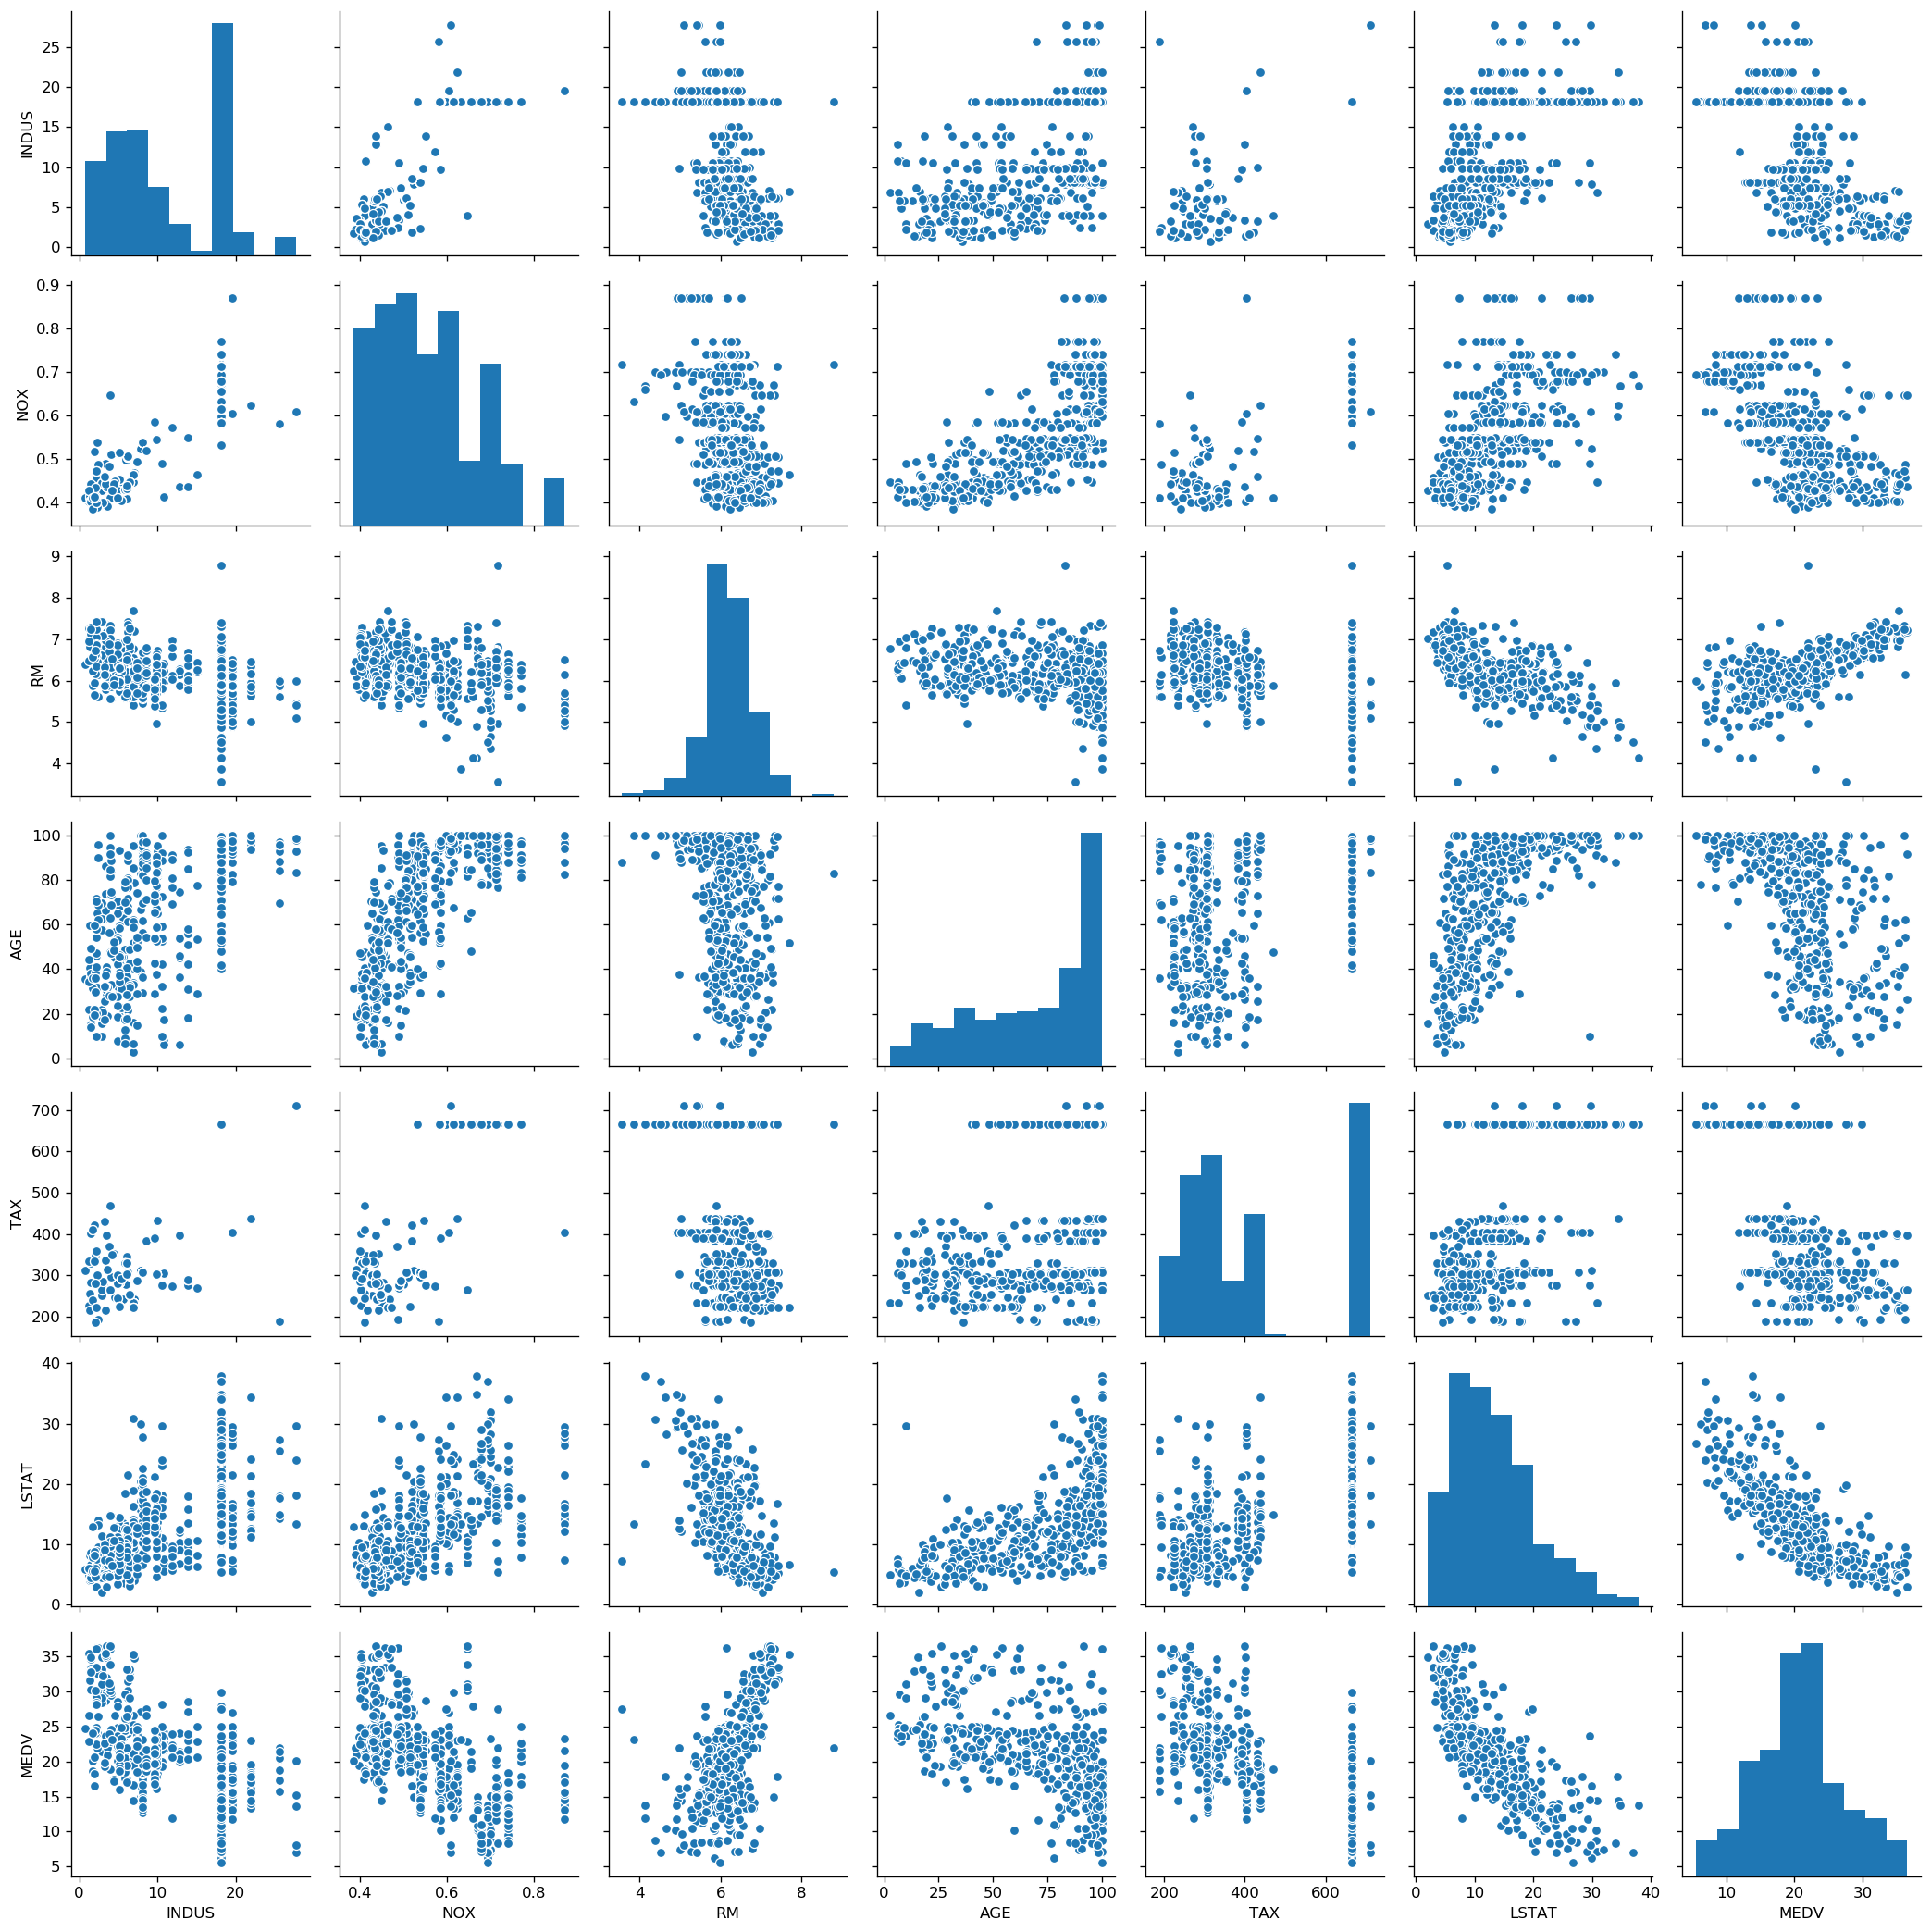

In [24]:
#colas de dispersion
cols=['INDUS','NOX','RM','AGE','TAX','LSTAT','MEDV']
sns.pairplot(df[cols],height=2.5)
plt.tight_layout()
plt.show()

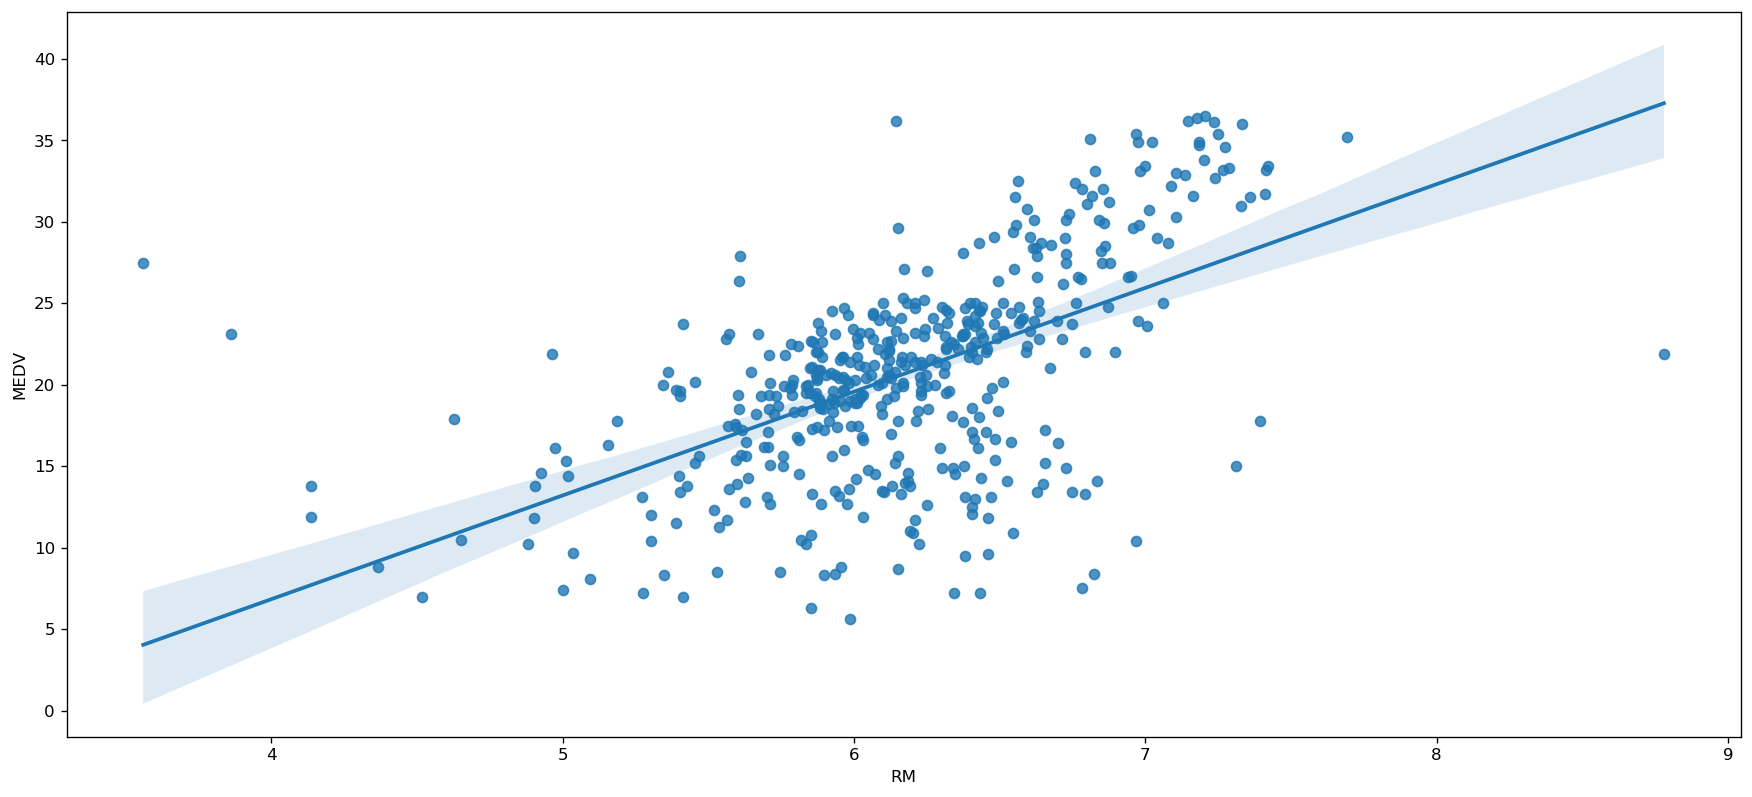

In [25]:
#mostrar la grafica de regresion
plt.figure(figsize=(18,8))
X=df['RM']
Y=df['MEDV']
ax = sns.regplot(x=X,y=Y,marker='o')

In [26]:
from sklearn.linear_model import LinearRegression
#instancia del modelo
reg = LinearRegression()

In [32]:
#crear los datos x,y y dividirlos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#semilla de aleatorios 
np.random.seed(1234)
#crear los datos X,Y
X=df['RM'].to_numpy().reshape(466,1)
Y=df['MEDV']
#division de entrenamiento y prueba
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)


In [33]:
#entrenar el modelo 
reg.fit(X_train,y_train)
#predecir los rta para el conjunto de prueba
y_pred=reg.predict(X_test)


In [36]:
#importar las metricas 
from sklearn.metrics import r2_score,mean_squared_error
#metricas
#coeficiente de determinacion
r2=r2_score(y_test,y_pred)
print('coeficiente de determinacion: \n',r2)

#error cuadratico medio
mse=mean_squared_error(y_test,y_pred)
print('error cuadratico medio: \n',mse)
#RMSE
rmse=np.sqrt(mse) ##devuelve el mse a unidades lineales
print('Raiz de error cuadratico medio: \n',rmse)

coeficiente de determinacion: 
 0.3215451666572783
error cuadratico medio: 
 25.582250980202563
Raiz de error cuadratico medio: 
 5.057889973121456


In [46]:
#coeficientes del modelo

print('pendiente: \n',reg.coef_)
print('intercepto: \n',reg.intercept_)


pendiente: 
 [6.18217844]
intercepto: 
 -17.2858110183946


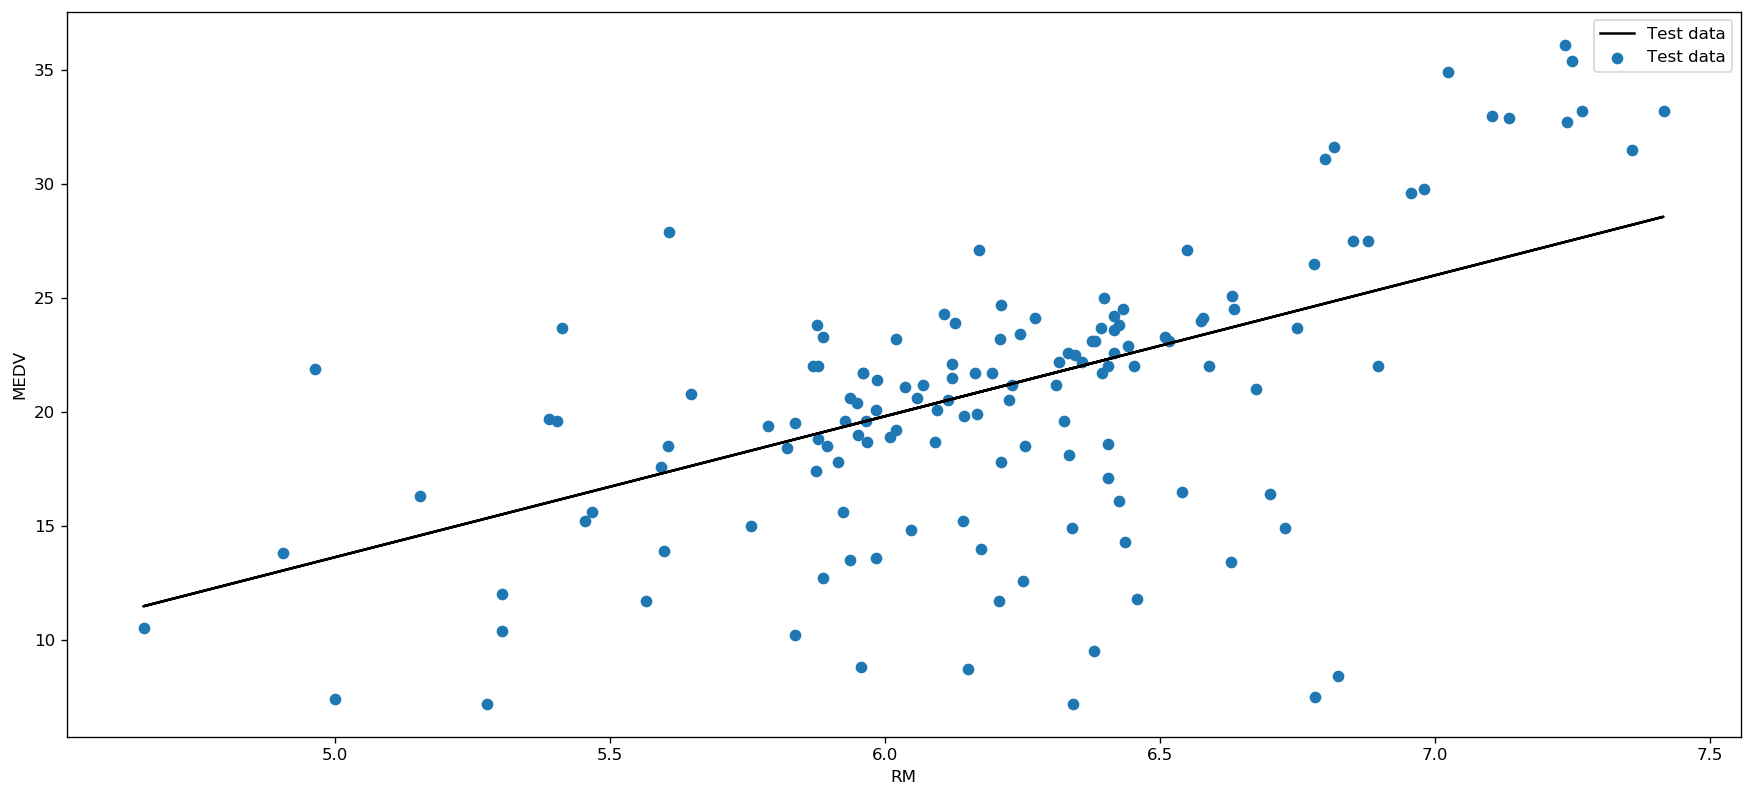

In [39]:
#resultado prueba
plt.figure(figsize=(18,8))
plt.scatter(X_test,y_test,label='Test data')
plt.plot(X_test,y_pred,color='black',label='Test data')
plt.legend()
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [40]:
X2= df[cols[:-1]]
Y2=df['MEDV']
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,Y2,test_size=0.3)

In [41]:
reg2=LinearRegression()
reg2.fit(X2_train,y2_train)
y2_predict=reg2.predict(X2_test)

In [42]:
r2_2=r2_score(y2_test,y2_predict)
print('coeficiente de determinacion',r2_2)
mse_2=mean_squared_error(y2_test,y2_predict)
print('Error cuadratico medio:',mse_2)

rmse_2=np.sqrt(mse_2)
print("raiz de error cuadratico medio: ",rmse_2)


coeficiente de determinacion 0.6160748404681217
Error cuadratico medio: 15.757616418951791
raiz de error cuadratico medio:  3.9695864292079333


In [47]:
print('pendiente: \n',reg2.coef_)
print('intercepto: \n',reg2.intercept_)

pendiente: 
 [-0.09773188 -0.41711586  1.79830791 -0.00446737 -0.00602792 -0.49331871]
intercepto: 
 20.161883389771248


In [48]:
from sklearn.tree import DecisionTreeRegressor
adr=DecisionTreeRegressor(max_depth=5)

In [49]:
adr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [50]:
y3_pred=adr.predict(X_test)

In [52]:
r2_3=r2_score(y_test,y3_pred)
print('coeficiente de determinacion',r2_3)
mse_3=mean_squared_error(y_test,y3_pred)
print('Error cuadratico medio:',mse_3)

rmse_3=np.sqrt(mse_3)
print("raiz de error cuadratico medio: ",rmse_3)

coeficiente de determinacion 0.28680999946413477
Error cuadratico medio: 26.891997364639355
raiz de error cuadratico medio:  5.185749450623251


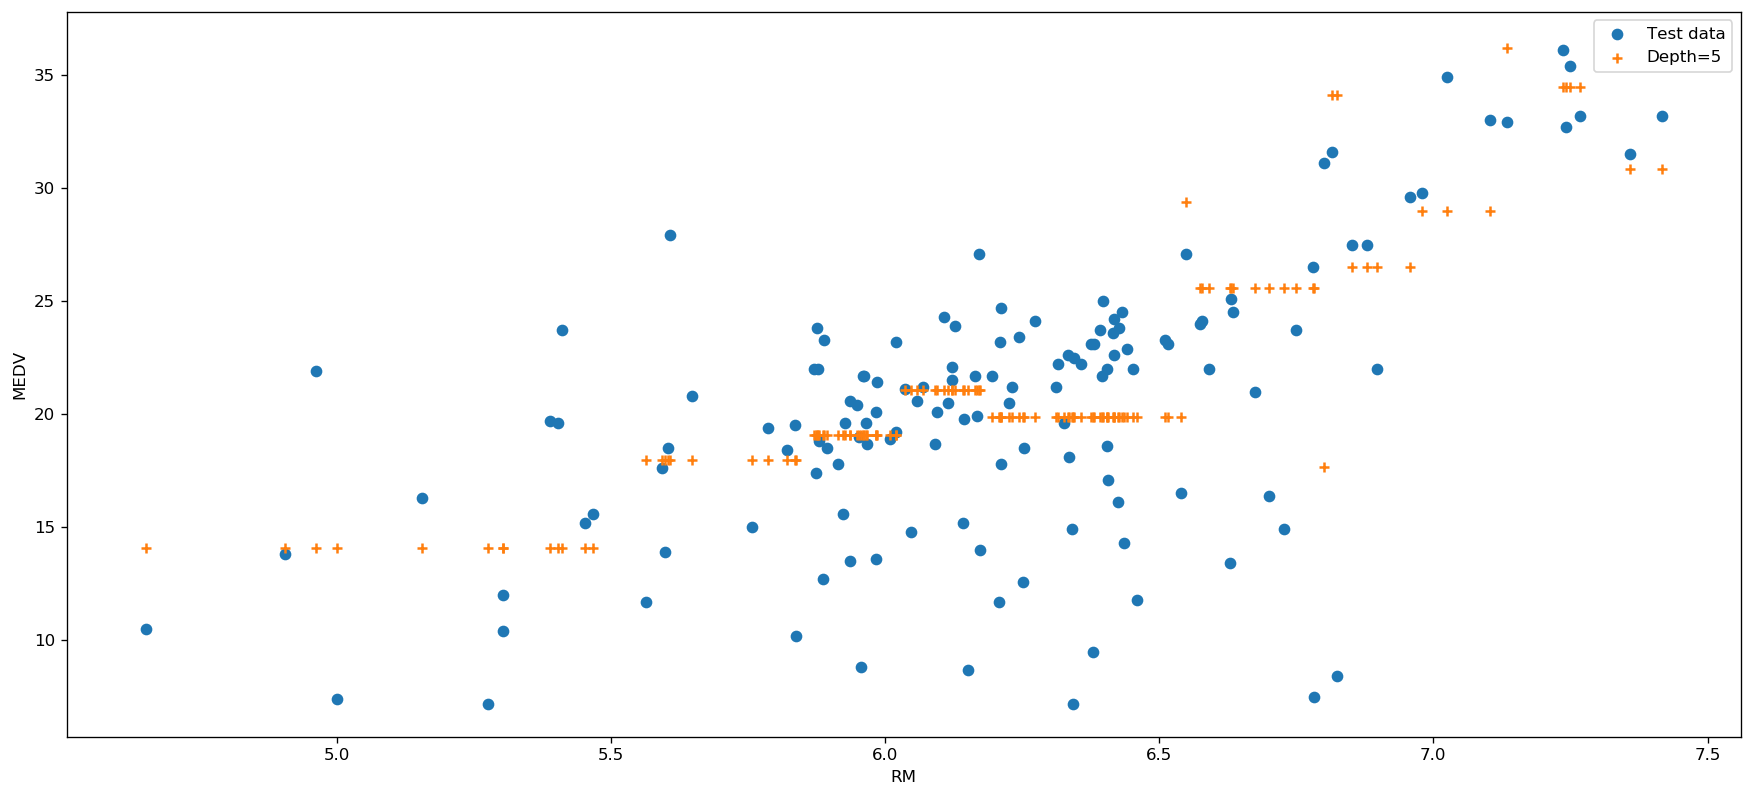

In [56]:
plt.figure(figsize=(18,8))
plt.scatter(X_test,y_test,label='Test data')
plt.scatter(X_test,y3_pred,marker='+',label='Depth=5')
plt.legend()
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [57]:
adr2=DecisionTreeRegressor()
adr2.fit(X2_train,y2_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [60]:
y4_pred=adr2.predict(X2_test)

In [61]:
r2_4=r2_score(y_test,y4_pred)
print('coeficiente de determinacion',r2_4)
mse_4=mean_squared_error(y_test,y4_pred)
print('Error cuadratico medio:',mse_4)

rmse_4=np.sqrt(mse_4)
print("raiz de error cuadratico medio: ",rmse_4)

coeficiente de determinacion -0.832343141116642
Error cuadratico medio: 69.0915
raiz de error cuadratico medio:  8.312129690999774


In [62]:
adr2.feature_importances_

array([0.04242105, 0.03363829, 0.23925338, 0.05323365, 0.05853082,
       0.57292281])